# Overview

On this notebook, we will load our trained Random Forest Regressor model from the previous step (training) and we will try to explain its predicted output using [SHAP (SHapley Additive exPlanations)](https://en.wikipedia.org/wiki/Shapley_value).

# Global Variables

In [54]:
from pathlib import Path

ROOT_DIR = globals()['_dh'][0].parent

# Load Model

In [55]:
from src.models.loading.scikitmodelloader import load_scikit_rf_regressor_model

model_path = ROOT_DIR / "saved_models/base-regressor.pkl"
saved_model = load_scikit_rf_regressor_model(model_path)

In [56]:
saved_model

ScikitRFRegressor(name='', model=RandomForestRegressor(max_depth=10, max_features='auto', random_state=42,
                      verbose=<VerboseEnum.VALUE_3: 2>))

# Explain Model

## Load data

In [57]:
features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "zipcode",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15",
]

It's important to explain our model in data that hasn't been used for training. Let's load our test features generated from the train/test split in the previous step (training):

In [58]:
import pandas as pd

load_path = (ROOT_DIR / "notebooks/test_features.pkl").as_posix()
test_features = pd.read_pickle(load_path)

In [59]:
test_features.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6325          3       1.75         1780     13095     1.0           0     0   
13473         2       1.00         1000      3700     1.0           0     0   
17614         3       1.00         1080      7486     1.5           0     0   
16970         3       2.25         2090      7500     1.0           0     0   
20868         2       2.50         1741      1439     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
6325           4      9        1780              0      1983             0   
13473          3      6         800            200      1929             0   
17614          3      6         990             90      1942             0   
16970          4      7        1280            810      1977             0   
20868          3      8        1446            295      2007             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
6325     98042  47.3670 -122.152           2750       13095  
13473    98118  47.5520 -122.290           1270        5000  
17614    98146  47.4838 -122.335           1170        7800  
16970    98031  47.3951 -122.172           1800        7350  
20868    98034  47.7043 -122.209           2090       10454

## Use SHAP for model explainability

We will use the [SHAP](https://shap.readthedocs.io/en/latest/index.html) library provided in Python, that provides functionality for explaining tree-based ML models using SHAP values. 

> With SHAP values we can quantify each feature's contribution to the predicted output. SHAP values closer to zero means the feature contributes little to the prediction whereas shap value away from zero indicates the feature contributes more.

> For each of the test samples, we can add their corresponding shap values to the expected value in order to get the prediction as follows:

![shap_values](shap_values.png)

Train a ShapExplainer with our test set:

In [60]:
from src.explainability.shapexplainer import ShapExplainer

shap_explainer = ShapExplainer(saved_model, test_features)
feature_explainability = shap_explainer.explain()

The average shap values per feature for all samples in the test dataset are the following:

In [61]:
feature_explainability

bedrooms          210.980385
bathrooms        -364.739557
sqft_living     -2201.642088
sqft_lot         -342.215999
floors             40.445694
waterfront       -595.137063
view              -73.136481
condition          -2.034640
grade           -4546.451504
sqft_above      -1171.740088
sqft_basement     -34.114234
yr_built         3463.307738
yr_renovated      -60.762156
zipcode          1074.446726
lat              -123.405864
long             2965.506198
sqft_living15    1218.788461
sqft_lot15         13.632178
dtype: float64

**Hint**: From the above values can you identify which features are contributing more to the predicted output? Let's visualize the results to find out more!

## Visualize features' contributions

Mean absolute SHAP value per feature:

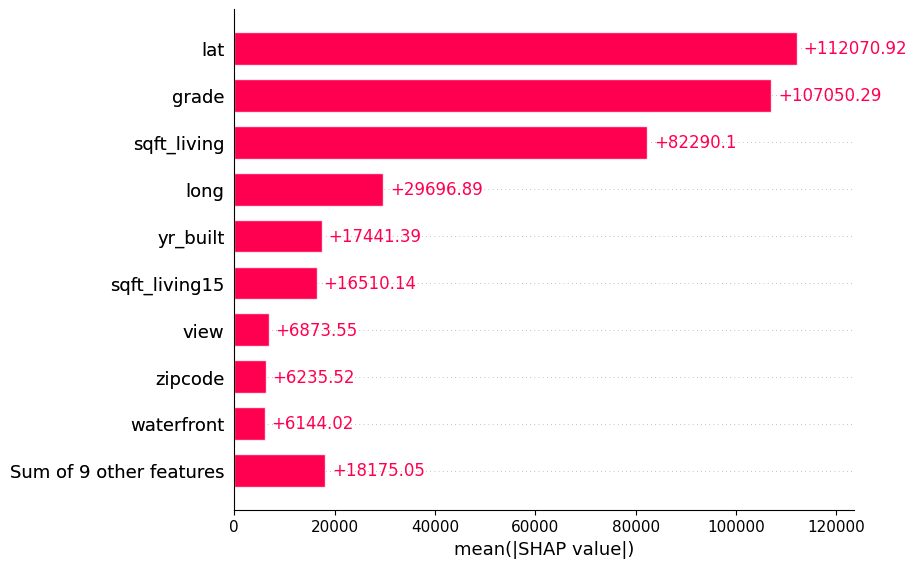

In [62]:
import shap

shap.plots.bar(shap_explainer.results)

On the above figure, we can clearly see that the top-5 features with the most contribution are the following:
- lat
- grade
- sqt_living
- long
- yr_built

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


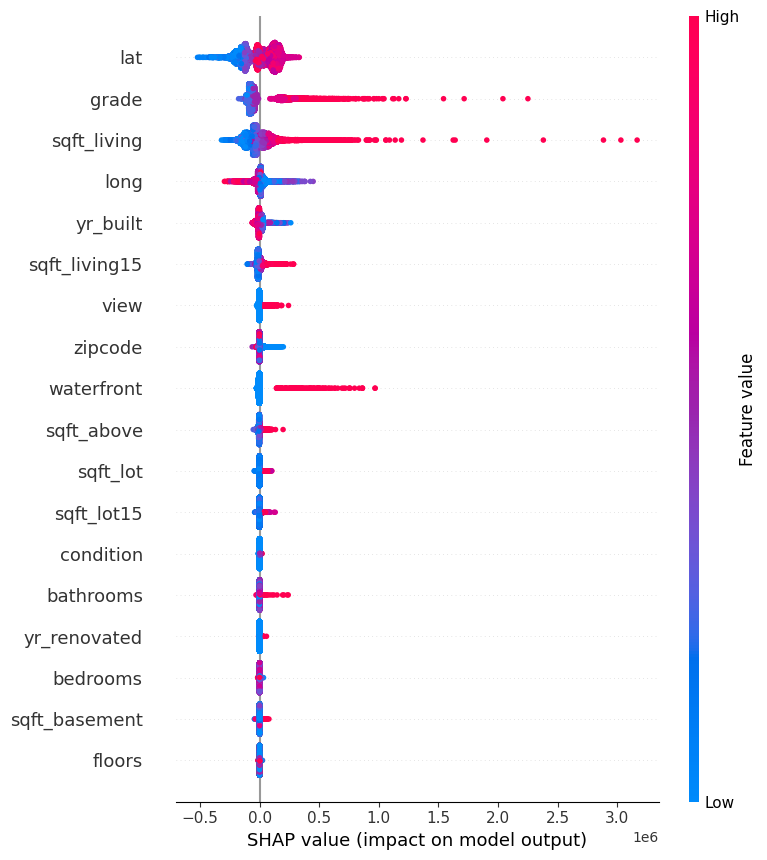

In [63]:
shap.summary_plot(shap_explainer.results)

With this summary plot, we can check the distribution of each feature contribution across the test set. It seems that for `grade`, `sqft_living` & `waterfront` there are some outliers that contribute more compared to the rest of our dataset.

There are many interesting plot functionalities provided by the SHAP library for interpreting features' contributions. You can find out more [here](https://shap.readthedocs.io/en/latest/api.html#plots).

# Conclusions

On this notebook, we loaded the Random Forest Regressor we trained in the previous step along with the test features generated by the train/test split. We used the [SHAP](https://shap.readthedocs.io/en/latest/index.html) library provided in Python to gain valuable insights on the features' contribution.

Unfortunately -due to time limitation- we couldn't spend more time to dive deeper into the features' distributions, identify potential outliers, or the meaning behind each feature (e.g., we couldn't find accurate feature descriptions). Also, additional model explainability methods could have been tested, e.g. Recursive Feature Elimination, Impurity-based Feature Importance (e.g., in Random Forest), Partial Dependency Plot etc.